Machine Learning Project Cathal Keating September 2022

In [4]:
#Required Packages
#ML packages loaded seperately

import yfinance as yf
from datetime import datetime
import talib as t
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from sklearn import datasets

In [5]:
#Importing a timeseries of data from Yahoo Finance for Apple.

#First initialise the start and end dates:
ending = datetime.now()
starting = datetime(ending.year - 5, ending.month, ending.day)

#Read in the data:
APPL = yf.download('AAPL', starting, ending) 

[*********************100%***********************]  1 of 1 completed


In [6]:
print(APPL.columns)
print(APPL.describe())

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean     92.078237    93.161213    91.044214    92.146815    90.904709   
std      46.588438    47.174508    45.991028    46.601981    47.020348   
min      35.994999    36.430000    35.500000    35.547501    34.366497   
25%      47.883751    48.145000    47.533751    47.842501    46.080112   
50%      74.959999    75.849998    74.125000    75.087502    73.683563   
75%     135.794998   137.065002   133.730003   135.379997   134.513458   
max     182.630005   182.940002   179.119995   182.009995   181.259933   

             Volume  
count  1.259000e+03  
mean   1.181425e+08  
std    5.512513e+07  
min    4.100000e+07  
25%    8.139980e+07  
50%    1.037184e+08  
75%    1.383288e+08  
max    4.265100e+08  


In [7]:
#Will be looking to predict a future return through different models
#I settled on a 20 day return as for most months this wil be approximately
# a 1 month return

APPL['20d_close_pct'] = APPL['Adj Close'].pct_change(20)
APPL['20d_future_close'] = APPL['Adj Close'].shift(-20)
APPL['20d_future_close_pct'] = APPL['20d_future_close'].pct_change(20)

In [8]:
#I will now generate some indicators from TALIB - these wille be the inputs into the models
#Where possible I decided to go with 200 days as my period


#Momentum Indicators
#ADX - Average Directional Movement Index
APPL['adx'] = t.ADX(APPL['High'].values, APPL['Low'].values, 
                    APPL['Adj Close'].values, timeperiod = 200)

#ADXR - Average Directional Movement Index Rating
APPL['adxr'] = t.ADXR(APPL['High'].values, APPL['Low'].values, 
                      APPL['Adj Close'].values, timeperiod = 200)

#APO - Absolute Price Oscillator
#might need to revisit the inputs
APPL['adxr'] = t.APO(APPL['Adj Close'].values, fastperiod=11, slowperiod=21, matype=0)

#AROONOSC - Aroon Oscillator
APPL['aroon'] = t.AROONOSC(APPL['High'].values, APPL['Low'].values, timeperiod = 200)

#BOP - Balance Of Power
APPL['bop'] = t.BOP(APPL['Open'].values, APPL['High'].values, APPL['Low'].values, 
            APPL['Adj Close'].values)

#CCI - Commodity Channel Index
APPL['cci'] = t.CCI(APPL['High'].values, APPL['Low'].values, 
                    APPL['Adj Close'].values, timeperiod = 200)

#CMO - Chande Momentum Oscillator
APPL['cmo'] = t.CMO(APPL['Adj Close'].values, timeperiod = 200)

#DX - Directional Movement Index
APPL['dx'] = t.DX(APPL['High'].values, APPL['Low'].values, 
                  APPL['Adj Close'].values, timeperiod = 200)

#MFI - Money Flow Index
#APPL['mfi'] = t.MFI(APPL['High'].values, APPL['Low'].values, 
                  #APPL['Adj Close'].values, APPL['Volume'].values, timeperiod=14)

#MINUS_DI - Minus Directional Indicator
APPL['minus_di'] = t.MINUS_DI(APPL['High'].values, APPL['Low'].values, 
                              APPL['Adj Close'].values, timeperiod = 200)


#MINUS_DM - Minus Directional Movement
APPL['minus_dm'] = t.MINUS_DM(APPL['High'].values, APPL['Low'].values, timeperiod = 200)

#MOM - Momentum
APPL['mom'] = t.MOM(APPL['Adj Close'].values, timeperiod = 200)

#PLUS_DI - Plus Directional Indicator
APPL['plus_di'] = t.PLUS_DI(APPL['High'].values, APPL['Low'].values, 
                              APPL['Adj Close'].values, timeperiod = 200)

#PLUS_DM - Plus Directional Movement
APPL['plus_dm'] = t.PLUS_DM(APPL['High'].values, APPL['Low'].values, timeperiod = 200)

#PPO - Percentage Price Oscillator
APPL['ppo'] = t.PPO( APPL['Adj Close'].values, fastperiod=11, slowperiod=21, matype=0)

#ROC - Rate of change : ((price/prevPrice)-1)*100
APPL['roc'] = t.ROC(APPL['Adj Close'].values, timeperiod = 200)

#ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
APPL['rocp'] = t.ROCP(APPL['Adj Close'].values, timeperiod = 200)

#ROCR - Rate of change ratio: (price/prevPrice)
APPL['rocr'] = t.ROCR(APPL['Adj Close'].values, timeperiod = 200)

#ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
APPL['rocr100'] = t.ROCR100(APPL['Adj Close'].values, timeperiod = 200)

#RSI - Relative Strength Index
APPL['rsi'] = t.RSI(APPL['Adj Close'].values, timeperiod = 200)

#TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
APPL['trix'] = t.TRIX(APPL['Adj Close'].values, timeperiod = 200)

#ULTOSC - Ultimate Oscillator
APPL['ultosc'] = t.ULTOSC(APPL['High'].values, APPL['Low'].values, APPL['Adj Close'].values, 
                          timeperiod1 = 7, timeperiod2 = 14, timeperiod3 = 28)

#WILLR - Williams' %R
APPL['willr'] = t.WILLR(APPL['High'].values, APPL['Low'].values, 
                          APPL['Adj Close'].values, timeperiod = 200)

#MACD - Moving Average Convergence/Divergence
APPL['macd'], APPL['macd_signal'], APPL['macd_hist'] = t.MACD(APPL['Adj Close'].values, fastperiod=12,
                                                                    slowperiod=26, signalperiod=9)

#Volume Indicators
#AD - Chaikin A/D Line
#APPL['ad'] = t.AD(APPL['High'].values, APPL['Low'].values, APPL['Adj Close'].values
                  #,APPL['Volume'].values)

#ADOSC - Chaikin A/D Oscillator
#APPL['adosc'] = t.ADOSC(APPL['High'].values, APPL['Low'].values, APPL['Adj Close'].values
                        #, APPL['Volume'].values, fastperiod=3, slowperiod=10)

#OBV - On Balance Volume
#APPL['obv'] = t.OBV(APPL['Adj Close'].values, APPL['Volume'].values)


#Cycle indicator functions

APPL['roc'] = t.HT_DCPERIOD(APPL['Adj Close'].values)

#HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
APPL['ht_dcphase'] = t.HT_DCPHASE(APPL['Adj Close'].values)

#HT_SINE - Hilbert Transform - SineWave
#APPL['ht_sine'], _ = t.HT_SINE(APPL['Adj Close'].values)

#HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
APPL['ht_trendmode'] = t.HT_TRENDMODE(APPL['Adj Close'].values)

#Overlap Functions
#DEMA - Double Exponential Moving Average
APPL['dema'] = t.DEMA(APPL['Adj Close'].values, timeperiod = 200)

#KAMA - Kaufman Adaptive Moving Average
APPL['kama'] = t.KAMA(APPL['Adj Close'].values, timeperiod = 200)

#SAR - Parabolic SAR
APPL['sar'] = t.SAR(APPL['High'].values, APPL['Low'].values, acceleration=0, maximum=0)

#SMA - Simple Moving Average
APPL['sma'] = t.SMA(APPL['Adj Close'].values, timeperiod = 200)

#TEMA - Triple Exponential Moving Average
APPL['tema'] = t.TEMA(APPL['Adj Close'].values, timeperiod = 200)

#TRIMA - Triangular Moving Average
APPL['trima'] = t.TRIMA(APPL['Adj Close'].values, timeperiod = 200)

#WMA - Weighted Moving Average
APPL['wma'] = t.WMA(APPL['Adj Close'].values, timeperiod = 200)

In [9]:
#At this point I am going to drop the NAs 
#This occurs with the moving averages and shifting of prices etc

APPL.dropna(inplace = True) 

#do this before the graph shows better alignment

In [10]:
print(APPL.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-02-04  78.827499  79.910004  78.407501  79.712502  78.222076  136616400   
2020-02-05  80.879997  81.190002  79.737503  80.362503  78.859932  118826800   
2020-02-06  80.642502  81.305000  80.065002  81.302498  79.782364  105425600   
2020-02-07  80.592499  80.849998  79.500000  80.007500  78.697899  117684000   
2020-02-10  78.544998  80.387497  78.462502  80.387497  79.071671  109348800   

            20d_close_pct  20d_future_close  20d_future_close_pct       adx  \
Date                                                                          
2020-02-04       0.063542         74.446144             -0.048272  7.333902   
2020-02-05       0.077281         72.031342             -0.086591  7.373571   
2020-02-06       0.072628         71.074753             -0.109142  7.413453   
2020-02-07       0.036041         65.453308 

In [11]:
#lets run a correlation

corr = APPL.corr()

print(corr)
APPL1 = APPL

                          Open      High       Low     Close  Adj Close  \
Open                  1.000000  0.999100  0.998816  0.997509   0.997440   
High                  0.999100  1.000000  0.998667  0.998790   0.998768   
Low                   0.998816  0.998667  1.000000  0.998848   0.998790   
Close                 0.997509  0.998790  0.998848  1.000000   0.999952   
Adj Close             0.997440  0.998768  0.998790  0.999952   1.000000   
Volume               -0.561399 -0.549506 -0.577725 -0.564325  -0.564775   
20d_close_pct         0.044723  0.041983  0.055193  0.054170   0.050814   
20d_future_close      0.928832  0.929859  0.931567  0.931359   0.932029   
20d_future_close_pct -0.333156 -0.334305 -0.329932 -0.333850  -0.331945   
adx                   0.037283  0.032900  0.031254  0.029764   0.022251   
adxr                  0.114959  0.109035  0.121322  0.115395   0.112492   
aroon                -0.099964 -0.103967 -0.102640 -0.105620  -0.111692   
bop                   0.2

<AxesSubplot:>

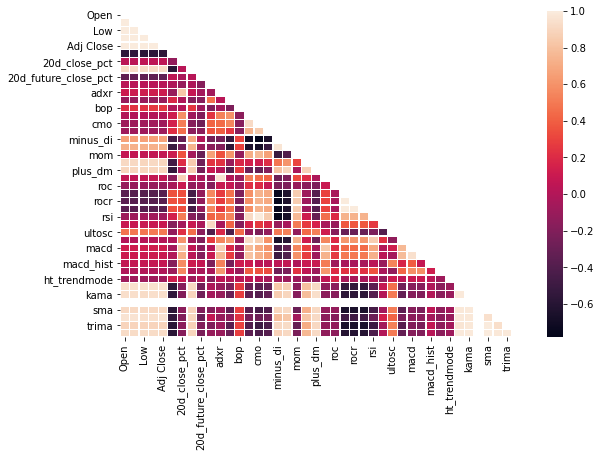

In [12]:
#Last look at correlations
corr = APPL.corr().round(decimals = 2)
f, ax = plt.subplots(figsize=(9, 6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = False, ax = ax, linewidths=0.3, mask = mask)
#print(type(corr))
#print(corr.head())
#Messy graph need to ammend
#print(corr.head())
#print(corr['20d_future_close_pct'])

<AxesSubplot:xlabel='20d_future_close_pct', ylabel='Count'>

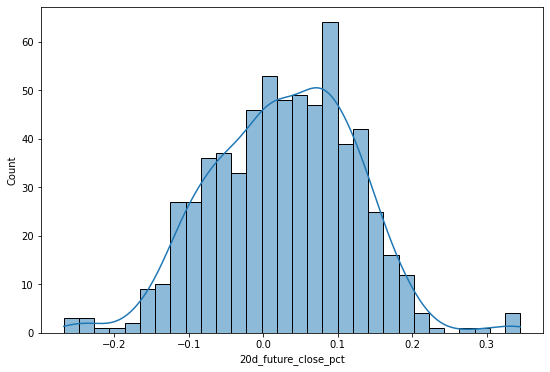

In [13]:
#Looking at histogram
f, ax = plt.subplots(figsize=(9, 6))
sns.histplot(data = APPL1['20d_future_close_pct'], bins = 30, kde = True)

Text(0.5, 0, 'Time')

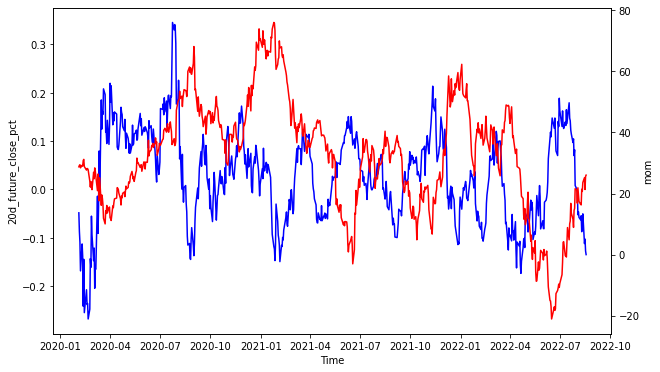

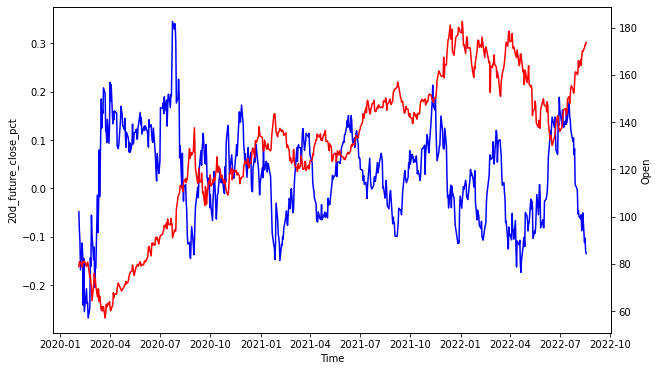

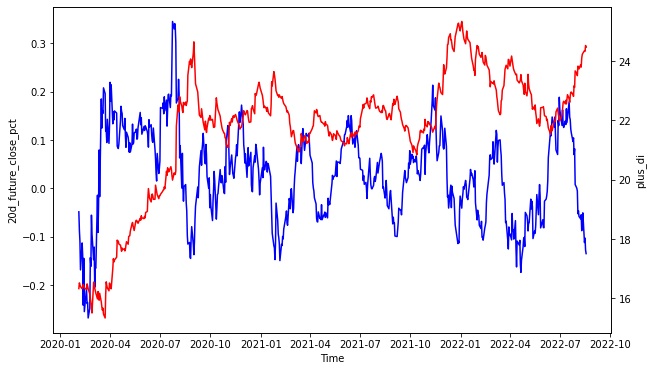

In [14]:
#graph the prices:
#I picked some of the more correlated variables

f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=APPL1['20d_future_close_pct'], color = 'blue')
ax2 = ax.twinx()
sns.lineplot(data=APPL1['mom'], color = 'red')
#f.title('20d_future_close_pct vs mom')
ax.set_xlabel('Time')


f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=APPL1['20d_future_close_pct'], color = 'blue')
ax2 = ax.twinx()
sns.lineplot(data=APPL1['Open'], color = 'red')
#f.title('20d_future_close_pct vs Open')
ax.set_xlabel('Time')


f, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=APPL1['20d_future_close_pct'], color = 'blue')
ax2 = ax.twinx()
sns.lineplot(data=APPL1['plus_di'], color = 'red')
#f.title('20d_future_close_pct vs plus_di')
ax.set_xlabel('Time')

In [15]:
#Lets set up the recordsets for regression
#We need the following:
#Our independent variables or features
independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()
print(independent_variables_names)
#Our dependent variables or targets
dependent_variable_name = ['20d_future_close_pct']
dependent_variable = APPL1[dependent_variable_name]

print(dependent_variable.columns)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '20d_close_pct', '20d_future_close', 'adx', 'adxr', 'aroon', 'bop', 'cci', 'cmo', 'dx', 'minus_di', 'minus_dm', 'mom', 'plus_di', 'plus_dm', 'ppo', 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'trix', 'ultosc', 'willr', 'macd', 'macd_signal', 'macd_hist', 'ht_dcphase', 'ht_trendmode', 'dema', 'kama', 'sar', 'sma', 'tema', 'trima', 'wma']
Index(['20d_future_close_pct'], dtype='object')


In [16]:
#Preparing the recordsets for linear and logistic regression
#As it is time series data I cannot use a simple train_test_split
#Have to order the data - 75% of the earliest data is the train set
#25% the most recent data is the test
regression_independent_variables = sm.add_constant(independent_variables)
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = regression_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = regression_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

In [17]:
#Quick check to make sure data looks ok:
print(train_regression_independent_variables.isnull().sum())
print(train_regression_dependent_variables.isnull().sum())
#Looks good

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
20d_close_pct       0
20d_future_close    0
adx                 0
adxr                0
aroon               0
bop                 0
cci                 0
cmo                 0
dx                  0
minus_di            0
minus_dm            0
mom                 0
plus_di             0
plus_dm             0
ppo                 0
roc                 0
rocp                0
rocr                0
rocr100             0
rsi                 0
trix                0
ultosc              0
willr               0
macd                0
macd_signal         0
macd_hist           0
ht_dcphase          0
ht_trendmode        0
dema                0
kama                0
sar                 0
sma                 0
tema                0
trima               0
wma                 0
dtype: int64
20d_future_close_pct    0
dtype: int64


Model 1 Linear Model

In [18]:
#Fit the Linear model
linear_model = sm.OLS(train_regression_dependent_variables, train_regression_independent_variables)
linear_model_results = linear_model.fit()

#Lets have a look at the summary output:
print(linear_model_results.summary())

                             OLS Regression Results                             
Dep. Variable:     20d_future_close_pct   R-squared:                       0.987
Model:                              OLS   Adj. R-squared:                  0.986
Method:                   Least Squares   F-statistic:                     913.3
Date:                  Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                          00:09:17   Log-Likelihood:                 1486.8
No. Observations:                   480   AIC:                            -2900.
Df Residuals:                       443   BIC:                            -2745.
Df Model:                            36                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Open                

model1 linear regression score (training data) (insignificant variables dropped): 
0.9846245059594534
model1 linear regression score (test data) (insignificant variables dropped): 
0.0653817660778685


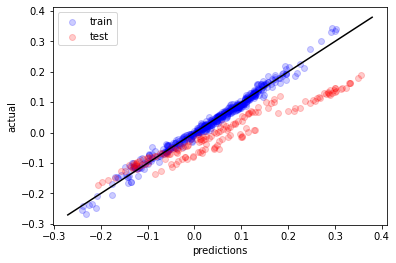

In [20]:
#Reapplying the linear regression
#Going to use this to streamline the record set
#Anything with a P Value greater than 0.05 remove

#picking out variables that have P-Valeus greater than 0.05
dropvariables = linear_model_results.pvalues[abs(linear_model_results.pvalues) > 0.05]
to_drop = dropvariables.index.tolist()
#Checking the variables
#print(to_drop)

#rerunning the old sets
independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

#Our dependent variables or targets
dependent_variable_name = ['20d_future_close_pct']
dependent_variable = APPL1[dependent_variable_name]

#new set with the dropped variables
cleaned_independent_variables = independent_variables.drop(independent_variables[to_drop], axis = 1)

#Linear regression scikit learn:
#With new record set

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#print(train_regression_independent_variables.columns)


#Fit the model
#Call the package
from sklearn.linear_model import LinearRegression
#Setting the model
linregclean = LinearRegression()
#Fit to the data
linregclean.fit(train_regression_independent_variables, train_regression_dependent_variables)
#make our predictions on our train and test set
train_linregclean_pred = linregclean.predict(train_regression_independent_variables)
test_linregclean_pred = linregclean.predict(test_regression_independent_variables)
#Check the scores of the train and test model

train_linregclean_score = linregclean.score(train_regression_independent_variables, 
                                  train_regression_dependent_variables)
test_linregclean_score = linregclean.score(test_regression_independent_variables, 
                                  test_regression_dependent_variables)

print("model1 linear regression score (training data) (insignificant variables dropped): \n" 
      + str(train_linregclean_score))
print("model1 linear regression score (test data) (insignificant variables dropped): \n" 
      + str(test_linregclean_score))

#Finally plot the data
plt.scatter(train_linregclean_pred, train_regression_dependent_variables,
            alpha=0.2, color='b', label='train')

plt.scatter(test_linregclean_pred, test_regression_dependent_variables, 
            alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend

plt.show()

Model 1.1 Ridge Linear Regression

C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.02004e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


model 1.1 ridge linear regression score (training data): 
0.9846200028922459
model 1.1 ridge linear regression score (test data): 
0.09384517009349036


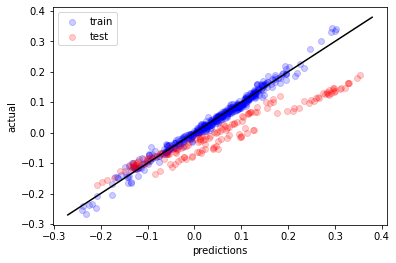

In [21]:
#Ridge Linear regression scikit learn:
#I don't think we need the constant any more so going to re run the datasets
#Ridge you penalise the bigger predictins

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#Fit the model
#Call the package
from sklearn.linear_model import Ridge
#Setting the model
ridgereg = Ridge(alpha = 0.1)
#Fit to the data
ridgereg.fit(train_regression_independent_variables, train_regression_dependent_variables)
#make our predictions on our train and test set
train_ridgereg_pred = ridgereg.predict(train_regression_independent_variables)
test_ridgereg_pred = ridgereg.predict(test_regression_independent_variables)
#Check the scores of the train and test model

train_ridgereg_score = ridgereg.score(train_regression_independent_variables, 
                                  train_regression_dependent_variables)
test_ridgereg_score = ridgereg.score(test_regression_independent_variables, 
                                  test_regression_dependent_variables)

print("model 1.1 ridge linear regression score (training data): \n" + str(train_ridgereg_score))
print("model 1.1 ridge linear regression score (test data): \n" + str(test_ridgereg_score))

#Finally plot the data
plt.scatter(train_ridgereg_pred, train_regression_dependent_variables,
            alpha=0.2, color='b', label='train')

plt.scatter(test_ridgereg_pred, test_regression_dependent_variables, 
            alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend

plt.show()

Hyperparameter tuning

In [22]:
#Setting the dataset

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#Fit the model
#Call the package
from sklearn.linear_model import Ridge
#list to store our scores:
scoresridge = []
for alpha in [0.1, 1, 10, 100, 1000, 10000, 100000]:
    tuneridgereg = Ridge(alpha = alpha)
    tuneridgereg.fit(train_regression_independent_variables, train_regression_dependent_variables)
    tuneridgereg_pred = tuneridgereg.predict(test_regression_independent_variables)
    scoresridge.append(tuneridgereg.score(test_regression_independent_variables, 
                                    test_regression_dependent_variables))

print(scoresridge)

#Find a way to plot these

[0.09384517009349036, 0.22951993037439522, 0.4831304410816738, 0.6669471460574605, 0.7811575697369967, 0.9607304971607069, 0.5809446670301166]


C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.02004e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.01995e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.01954e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.01738e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model 1.2 Lasso Linear Regression

model 1.2 lasso linear regression score (training data): 
0.8800441098461972
model 1.2 lasso linear regression score (test data): 
0.9797012069682115


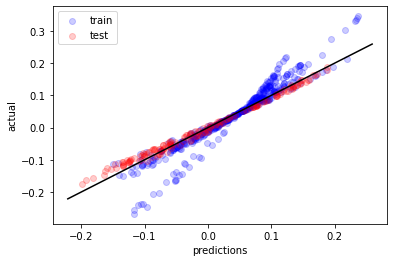

In [23]:
#Lasso Linear regression scikit learn:
#I don't think we need the constant any more so going to re run the datasets
#Lasso you penalise the bigger predictins

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#Fit the model
#Call the package
from sklearn.linear_model import Lasso
#Setting the model
lassoreg = Lasso(alpha = 0.1)
#Fit to the data
lassoreg.fit(train_regression_independent_variables, train_regression_dependent_variables)
#make our predictions on our train and test set
train_lassoreg_pred = lassoreg.predict(train_regression_independent_variables)
test_lassoreg_pred = lassoreg.predict(test_regression_independent_variables)
#Check the scores of the train and test model

train_lassoreg_score = lassoreg.score(train_regression_independent_variables, 
                                  train_regression_dependent_variables)
test_lassoreg_score = lassoreg.score(test_regression_independent_variables, 
                                  test_regression_dependent_variables)

print("model 1.2 lasso linear regression score (training data): \n" + str(train_lassoreg_score))
print("model 1.2 lasso linear regression score (test data): \n" + str(test_lassoreg_score))

#Finally plot the data
plt.scatter(train_lassoreg_pred, train_regression_dependent_variables,
            alpha=0.2, color='b', label='train')

plt.scatter(test_lassoreg_pred, test_regression_dependent_variables, 
            alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend

plt.show()

Hyperparameter tuning

In [24]:
#Lasso Linear regression scikit learn:
#I don't think we need the constant any more so going to re run the datasets
#Lasso you penalise the bigger predictins

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#Fit the model
#Call the package
from sklearn.linear_model import Lasso
#list to store our scores:
lassoscores = []
for alpha in np.linspace(0.001, 1, 10):
    tunelassoreg = Lasso(alpha = alpha)
    tunelassoreg.fit(train_regression_independent_variables, train_regression_dependent_variables)
    tunelassoreg_pred = tunelassoreg.predict(test_regression_independent_variables)
    lassoscores.append((alpha, tunelassoreg.score(test_regression_independent_variables, 
                                    test_regression_dependent_variables)))

print(lassoscores)
#best alpha is 0.112

[(0.001, 0.6074597054913418), (0.112, 0.987045911748693), (0.223, 0.8980161862299416), (0.334, 0.507608551250744), (0.445, -0.10414488317320592), (0.556, -0.1718763118374964), (0.667, -0.2328211074631068), (0.778, -0.2328211175778867), (0.889, -0.2328211276926666), (1.0, -0.23282113780744695)]


C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.551e-02, tolerance: 4.311e-04
  model = cd_fast.enet_coordinate_descent(


Feature Selection

C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.551e-02, tolerance: 4.311e-04
  model = cd_fast.enet_coordinate_descent(


<function matplotlib.pyplot.show(close=None, block=None)>

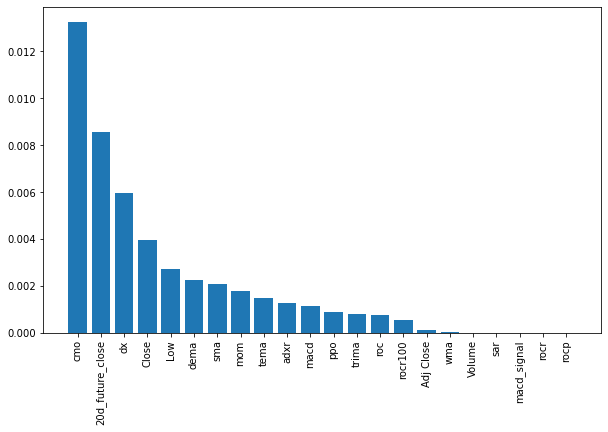

In [25]:
#Feel the model is over complicated (too manny variables)
#going to use lasso with alpha = 0.112 to access feature selection

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = cleaned_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = cleaned_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#Fit the model
#Call the package
from sklearn.linear_model import Lasso
#Setting the model
lassoreg = Lasso(alpha = 0.001)
#Fit to the data
lassoreg.fit(train_regression_independent_variables, train_regression_dependent_variables)

#Pull out the coeficents
lassoreg_coef = abs(lassoreg.coef_)
#print(train_regression_independent_variables.columns)
#print(lassoreg_coef)

feature_dict = dict(zip(train_regression_independent_variables.columns, 
                       lassoreg_coef))

feature_df = pd.DataFrame.from_dict(feature_dict, orient = 'index')
feature_df.columns = ['coefficent']
#print(feature_df)
#print(feature_df.index)
feature_df.sort_values(by = ['coefficent'], inplace = True,  ascending = False)
#print(feature_df)


f, ax = plt.subplots(figsize=(10, 6))
plt.bar(feature_df.index, feature_df['coefficent'])
plt.xticks(rotation = 90)
plt.show


Out of the 22 variables I will split this in half to include the top 11 variables
This wil be fit to my final linear model

['ppo', 'trima', 'roc', 'rocr100', 'Adj Close', 'wma', 'Volume', 'sar', 'macd_signal', 'rocr', 'rocp']
model1 linear regression score (training data) (final variable list): 
0.9814175187696624
model1 linear regression score (test data) (final variable list): 
0.3190151298947982


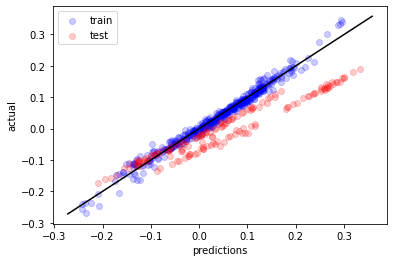

In [26]:
updatedfeaturenames = feature_df.index.tolist()[11:23]
print(updatedfeaturenames)

#rerunning the old sets
independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

#Our dependent variables or targets
dependent_variable_name = ['20d_future_close_pct']
dependent_variable = APPL1[dependent_variable_name]

#new set with the dropped variables
finalreg_independent_variables = independent_variables.drop(independent_variables[updatedfeaturenames],
                                                           axis = 1)

#Linear regression scikit learn:
#With new record set

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_regression_independent_variables = finalreg_independent_variables[:train_size]
train_regression_dependent_variables = dependent_variable[:train_size]
test_regression_independent_variables = finalreg_independent_variables[train_size:]
test_regression_dependent_variables = dependent_variable[train_size:]

#print(train_regression_independent_variables.columns)


#Fit the model
#Call the package
from sklearn.linear_model import LinearRegression
#Setting the model
linregfinal = LinearRegression()
#Fit to the data
linregfinal.fit(train_regression_independent_variables, train_regression_dependent_variables)
#make our predictions on our train and test set
train_linregfinal_pred = linregfinal.predict(train_regression_independent_variables)
test_linregfinal_pred = linregfinal.predict(test_regression_independent_variables)
#Check the scores of the train and test model

train_linregfinal_score = linregfinal.score(train_regression_independent_variables, 
                                  train_regression_dependent_variables)
test_linregfinal_score = linregfinal.score(test_regression_independent_variables, 
                                  test_regression_dependent_variables)

print("model1 linear regression score (training data) (final variable list): \n" 
      + str(train_linregfinal_score))
print("model1 linear regression score (test data) (final variable list): \n" 
      + str(test_linregfinal_score))

#Finally plot the data
plt.scatter(train_linregfinal_pred, train_regression_dependent_variables,
            alpha=0.2, color='b', label='train')

plt.scatter(test_linregfinal_pred, test_regression_dependent_variables, 
            alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend

plt.show()

much better than the original model

Model 3 KNN

In [27]:
#Going to start again - entire dataset

#need to put in the logistic factor
#going to use 0 - ie if return <= 0 -> 0, if return > 0 -> 1 

independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

APPL1['negative_positive_20d_return'] = APPL1['20d_future_close_pct'].apply(lambda x:
                                                                           False if x <= 0 else True)

#drop this from the independent
classification_independent_variables = APPL1.drop(['negative_positive_20d_return'], axis = 1)
classification_independent_variables_names = independent_variables.columns.values.tolist()

classification_dependent_variable_name = ['negative_positive_20d_return']
classification_dependent_variable = APPL1[classification_dependent_variable_name]

print(APPL1['negative_positive_20d_return'].value_counts().sort_index())

#print(classification_dependent_variable)
#print(independent_variables_names)

#Setting up the test and train sets

#regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_independent_variables = classification_independent_variables[:train_size]
train_dependent_variables = classification_dependent_variable[:train_size]
test_independent_variables = classification_independent_variables[train_size:]
test_dependent_variables = classification_dependent_variable[train_size:]
print(test_dependent_variables.value_counts().sort_index())

#Fit the model
#Call the package
from sklearn.neighbors import KNeighborsClassifier
#Setting the model
knn = KNeighborsClassifier(n_neighbors = 10)
#Fit to the data
knn.fit(train_independent_variables, train_dependent_variables)
#make our predictions on our train and test set
train_knn_pred = knn.predict(train_independent_variables)
test_knn_pred = knn.predict(test_independent_variables)
#Check the scores of the train and test model

train_knn_score = knn.score(train_independent_variables, 
                                  train_dependent_variables)
test_knn_score = knn.score(test_independent_variables, 
                                  test_dependent_variables)

print("model 3 K nearest neighbor score (training data) (10 neighbors): \n" + str(train_knn_score))
print("model 3 K nearest neighbor score (test data)(10 neighbors): \n" + str(test_knn_score))

#Finally plot the data
#from mlxtend.plotting import plot_decision_regions
#plot_decision_regions(test_independent_variables, test_dependent_variables, clf = knn)
#plt.show()

#print(knn.effective_metric_params_)


False    240
True     401
Name: negative_positive_20d_return, dtype: int64
negative_positive_20d_return
False                           93
True                            68
dtype: int64


C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model 3 K nearest neighbor score (training data) (10 neighbors): 
0.7125
model 3 K nearest neighbor score (test data)(10 neighbors): 
0.38509316770186336


In [ ]:
'''
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = train_independent_variables[:, 0].min() - 1, train_independent_variables[:, 0].max() + 1
y_min, y_max = train_independent_variables[:, 1].min() - 1, train_independent_variables[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(train_independent_variables[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
'''

Hyperparameter tuning and scaling

False    240
True     401
Name: negative_positive_20d_return, dtype: int64
negative_positive_20d_return
False                           93
True                            68
dtype: int64


C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was

    neighbors     score
0           2  0.962500
1           4  0.956250
2           6  0.952083
3           8  0.956250
4          10  0.941667
5          12  0.950000
6          14  0.941667
7          16  0.939583
8          18  0.933333
9          20  0.920833
10         22  0.916667
11         24  0.908333
12         26  0.904167
13         28  0.900000
14         30  0.883333
15         32  0.875000
16         34  0.854167
17         36  0.839583
18         38  0.810417
19         40  0.800000
20         42  0.789583
21         44  0.785417
22         46  0.781250
23         48  0.770833
    neighbors     score
0           2  0.720497
1           4  0.726708
2           6  0.732919
3           8  0.720497
4          10  0.720497
5          12  0.701863
6          14  0.695652
7          16  0.683230
8          18  0.664596
9          20  0.658385
10         22  0.645963
11         24  0.633540
12         26  0.639752
13         28  0.645963
14         30  0.627329
15         32  0

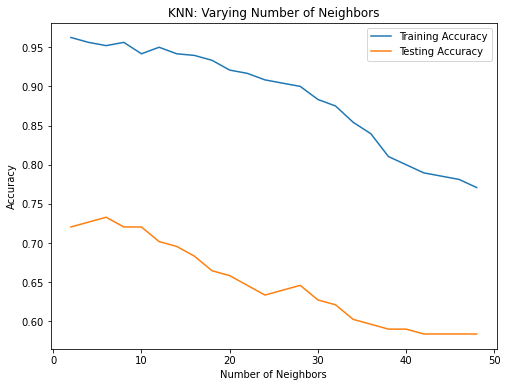

In [28]:
#Going to start again - entire dataset

#need to put in the logistic factor
#going to use 0 - ie if return <= 0 -> 0, if return > 0 -> 1 

independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

APPL1['negative_positive_20d_return'] = APPL1['20d_future_close_pct'].apply(lambda x:
                                                                           False if x <= 0 else True)

#drop this from the independent
classification_independent_variables = APPL1.drop(['negative_positive_20d_return'], axis = 1)
classification_independent_variables_names = independent_variables.columns.values.tolist()

classification_dependent_variable_name = ['negative_positive_20d_return']
classification_dependent_variable = APPL1[classification_dependent_variable_name]

print(APPL1['negative_positive_20d_return'].value_counts().sort_index())

#print(classification_dependent_variable)
#print(independent_variables_names)

#Setting up the test and train sets and scaling them

#regression_independent_variables = independent_variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_size = int(0.75*dependent_variable.shape[0])
train_independent_variables = sc.fit_transform(classification_independent_variables[:train_size])
train_dependent_variables = classification_dependent_variable[:train_size]
test_independent_variables = sc.fit_transform(classification_independent_variables[train_size:])
test_dependent_variables = classification_dependent_variable[train_size:]
print(test_dependent_variables.value_counts().sort_index())


#Fit the model
#Call the package
from sklearn.neighbors import KNeighborsClassifier


train_knntunescores = []
test_knntunescores = []
neighbors = range(2, 50, 2)

for neighbor in neighbors:
    
    knntune = KNeighborsClassifier(n_neighbors = neighbor)
    #Fit to the data
    knntune.fit(train_independent_variables, train_dependent_variables)
    #Setting the model
    knntune_pred = knntune.predict(test_independent_variables)
    train_knntunescores.append((neighbor, knntune.score(train_independent_variables, 
                                    train_dependent_variables)))
    test_knntunescores.append((neighbor, knntune.score(test_independent_variables, 
                                    test_dependent_variables)))
    

df_train_knntunescores = pd.DataFrame(train_knntunescores, columns=['neighbors', 'score'])
df_test_knntunescores = pd.DataFrame(test_knntunescores, columns=['neighbors', 'score'])

print(df_train_knntunescores)
print(df_test_knntunescores)

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, df_train_knntunescores['score'], label="Training Accuracy")
plt.plot(neighbors, df_test_knntunescores['score'], label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()



6 seems to be the best
For the next section I will use the features predicted by t test of coefficents and feature selection in the regression example
I am going to continue scaling - this seems the best approach

In [29]:
updatedfeaturenames = feature_df.index.tolist()[11:23]
print(updatedfeaturenames)

#rerunning the old sets
independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

#Our dependent variables or targets
dependent_variable_name = ['20d_future_close_pct']
dependent_variable = APPL1[dependent_variable_name]

#new set with the dropped variables
finalreg_independent_variables = independent_variables.drop(independent_variables[updatedfeaturenames],
                                                           axis = 1)
##########

dependent_variable['negative_positive_20d_return'] = dependent_variable['20d_future_close_pct'].apply(lambda x:
                                                                           False if x <= 0 else True)

finalreg_dependent_variable = dependent_variable.drop(['20d_future_close_pct'], axis = 1)

#print(finalreg_dependent_variable.columns)

#Linear regression scikit learn:
#With new record set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_independent_variables = sc.fit_transform(finalreg_independent_variables[:train_size])
train_dependent_variables = finalreg_dependent_variable[:train_size]
test_independent_variables = sc.fit_transform(finalreg_independent_variables[train_size:])
test_dependent_variables = finalreg_dependent_variable[train_size:]

print(test_dependent_variables.value_counts().sort_index())

#Fit the model
#Call the package
from sklearn.neighbors import KNeighborsClassifier
#Setting the model
#6 was chosen from previous example
knn = KNeighborsClassifier(n_neighbors = 6)
#Fit to the data
knn.fit(train_independent_variables, train_dependent_variables)
#make our predictions on our train and test set
train_knn_pred = knn.predict(train_independent_variables)
test_knn_pred = knn.predict(test_independent_variables)
#Check the scores of the train and test model

train_knn_score = knn.score(train_independent_variables, 
                                  train_dependent_variables)
test_knn_score = knn.score(test_independent_variables, 
                                  test_dependent_variables)

print("model 3 K nearest neighbor score (training data) (6 neighbors): \n" + str(train_knn_score))
print("model 3 K nearest neighbor score (test data)(6 neighbors): \n" + str(test_knn_score))



['ppo', 'trima', 'roc', 'rocr100', 'Adj Close', 'wma', 'Volume', 'sar', 'macd_signal', 'rocr', 'rocp']
negative_positive_20d_return
False                           93
True                            68
dtype: int64


<ipython-input-29-685569e76089>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dependent_variable['negative_positive_20d_return'] = dependent_variable['20d_future_close_pct'].apply(lambda x:
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model 3 K nearest neighbor score (training data) (6 neighbors): 
0.9854166666666667
model 3 K nearest neighbor score (test data)(6 neighbors): 
0.7701863354037267


feature seletion + scaling + parameter tuning gives best answer of 0.77

Model 4 Random Forest

In [33]:
#Going to start again - entire dataset

#need to put in the logistic factor
#going to use 0 - ie if return <= 0 -> 0, if return > 0 -> 1 

independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

APPL1['negative_positive_20d_return'] = APPL1['20d_future_close_pct'].apply(lambda x:
                                                                           False if x <= 0 else True)

#drop this from the independent
classification_independent_variables = APPL1.drop(['negative_positive_20d_return'], axis = 1)
classification_independent_variables_names = independent_variables.columns.values.tolist()

classification_dependent_variable_name = ['negative_positive_20d_return']
classification_dependent_variable = APPL1[classification_dependent_variable_name]

print(APPL1['negative_positive_20d_return'].value_counts().sort_index())

#print(classification_dependent_variable)
#print(independent_variables_names)

#Setting up the test and train sets

#regression_independent_variables = independent_variables
train_size = int(0.75*dependent_variable.shape[0])
train_independent_variables = classification_independent_variables[:train_size]
train_dependent_variables = classification_dependent_variable[:train_size]
test_independent_variables = classification_independent_variables[train_size:]
test_dependent_variables = classification_dependent_variable[train_size:]
print(test_dependent_variables.value_counts().sort_index())

#Fit the model
#Call the package
from sklearn.ensemble import RandomForestRegressor
#Setting the model
ranfor = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
#Fit to the data
ranfor.fit(train_independent_variables, train_dependent_variables)
#make our predictions on our train and test set
train_ranfor_pred = ranfor.predict(train_independent_variables)
test_ranfor_pred = ranfor.predict(test_independent_variables)
#Check the scores of the train and test model

train_ranfor_score = ranfor.score(train_independent_variables, 
                                  train_dependent_variables)
test_ranfor_score = ranfor.score(test_independent_variables, 
                                  test_dependent_variables)

print("model 5 decision tree score (training data): \n" + str(train_ranfor_score))
print("model 5 decision tree score (test data): \n" + str(test_ranfor_score))

#need to find a better graph
'''
#Finally plot the data
plt.scatter(train_ranfor_pred, train_dependent_variables,
            alpha=0.2, color='b', label='train')

plt.scatter(test_ranfor_pred, test_dependent_variables, 
            alpha=0.2, color='r', label='test')

xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend

plt.show()
'''

False    240
True     401
Name: negative_positive_20d_return, dtype: int64
negative_positive_20d_return
False                           93
True                            68
dtype: int64


<ipython-input-33-a93451973f40>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranfor.fit(train_independent_variables, train_dependent_variables)


model 5 decision tree score (training data): 
0.7616441526458062
model 5 decision tree score (test data): 
0.3248094543154907


"\n#Finally plot the data\nplt.scatter(train_ranfor_pred, train_dependent_variables,\n            alpha=0.2, color='b', label='train')\n\nplt.scatter(test_ranfor_pred, test_dependent_variables, \n            alpha=0.2, color='r', label='test')\n\nxmin, xmax = plt.xlim()\nplt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')\n\nplt.xlabel('predictions')\nplt.ylabel('actual')\nplt.legend()  # show the legend\n\nplt.show()\n"

Hyperparameter tuning and scaling

In [34]:
#Going to start again - entire dataset

#need to put in the logistic factor
#going to use 0 - ie if return <= 0 -> 0, if return > 0 -> 1 

independent_variables = APPL1.drop(['20d_future_close_pct'], axis = 1)
independent_variables_names = independent_variables.columns.values.tolist()

APPL1['negative_positive_20d_return'] = APPL1['20d_future_close_pct'].apply(lambda x:
                                                                           False if x <= 0 else True)

#drop this from the independent
classification_independent_variables = APPL1.drop(['negative_positive_20d_return'], axis = 1)
classification_independent_variables_names = independent_variables.columns.values.tolist()

classification_dependent_variable_name = ['negative_positive_20d_return']
classification_dependent_variable = APPL1[classification_dependent_variable_name]

print(APPL1['negative_positive_20d_return'].value_counts().sort_index())

#Setting up the test and train sets

#regression_independent_variables = independent_variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_size = int(0.75*dependent_variable.shape[0])
train_independent_variables = sc.fit_transform(classification_independent_variables[:train_size])
train_dependent_variables = classification_dependent_variable[:train_size]
test_independent_variables = sc.fit_transform(classification_independent_variables[train_size:])
test_dependent_variables = classification_dependent_variable[train_size:]
print(test_dependent_variables.value_counts().sort_index())

#parameter tuning

param_grid = {'n_estimators' : [200, 500, 1000, 5000, 10000], 
              'max_depth' : [3, 5, 10], 
              #'max_features' : [4, 8, 12], 
              'random_state' : [42]
            #'criterion' : ['gini', 'entropy']}
             }

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#Setting the model
ranfortuned = RandomForestRegressor()
#Fit to the data
#ranfortuned.fit(train_regression_independent_variables, train_regression_dependent_variables)

grid_ranfortuned = GridSearchCV(estimator = ranfortuned, param_grid = param_grid)

grid_ranfortuned.fit(train_independent_variables, train_dependent_variables)

print(grid_ranfortuned.best_params_)

False    240
True     401
Name: negative_positive_20d_return, dtype: int64
negative_positive_20d_return
False                           93
True                            68
dtype: int64


C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\mod

C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\mod

C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cathal Keating\Anaconda3\Anaconda3\lib\site-packages\sklearn\mod

{'max_depth': 3, 'n_estimators': 500, 'random_state': 42}
